In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(Path("app_stats.csv"))
df

,Download Date,Download Location,y
0,3.368873,6.174326,0
1,-3.091484,0.052052,0
2,2.240576,1.259282,0
3,6.809486,5.390839,0
4,-3.557147,-0.667529,0
...,...,...,...
645,-9.353526,2.167014,0
646,-1.855451,3.262719,0
647,0.488071,1.371498,0
648,4.074942,4.157977,0


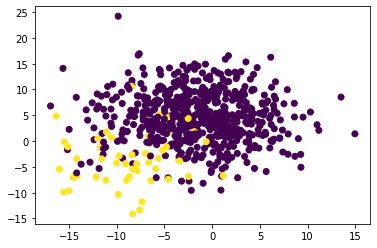

In [5]:
# Plot the data
plt.scatter(
    # Put the user download date along the x-axis
    x = df['Download Date'],
    # Put the user download location along the y-axis
    y = df['Download Location'],
    # Plot the binary y variable (whether the user made a transaction) as the color
    c=df['y']
 )

# Show the plot
plt.show()

In [6]:
# Import the module
from sklearn.model_selection import train_test_split

# Separate the y variable, the labels
y = df['y']

# Separate the X variable, the features
X = df.drop(columns=['y'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Count the distinct values
y_train.value_counts()

0    448
1     39
Name: y, dtype: int64

In [11]:
# Import the module
from imblearn.over_sampling import RandomOverSampler
# Resample the data
random_oversampler = RandomOverSampler(random_state=1)
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [12]:
# Count the distinct values
y_resampled.value_counts()

0    448
1    448
Name: y, dtype: int64

In [13]:
# Import the module
from sklearn.linear_model import LogisticRegression

# Declare a logistic regression model
model = LogisticRegression(random_state=1)

# Fit the model
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [14]:
# Import the module
from sklearn.metrics import confusion_matrix

# Predict the labels for the testing features
y_pred = model.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[131  21]
 [  1  10]]


In [15]:
# Import the module
from sklearn.metrics import balanced_accuracy_score

# Print the accuracy score
balanced_accuracy_score(y_test, y_pred)

0.8854665071770335

In [16]:
# Import the module
from imblearn.metrics import classification_report_imbalanced

# Print the classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.86      0.91      0.92      0.89      0.78       152
          1       0.32      0.91      0.86      0.48      0.89      0.79        11

avg / total       0.95      0.87      0.91      0.89      0.89      0.78       163

